# InNav Visualization

## README
This code displays the trajectory of path in shopping mall map. It includes both the visualization of the predicted path, as well as the actual path from a training dataset for having a intuitive comparison between prediction and ground truth.

To play it on any building, set {base}, {path} to the desired building.

In [1]:
# CPU libraries
import os
import json
import glob
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import plotly.graph_objs as go

from PIL import Image, ImageOps
from skimage import io
from skimage.color import rgba2rgb, rgb2xyz
from tqdm import tqdm
from dataclasses import dataclass
from math import floor, ceil


In [2]:
!cp -r ../input/indoor-locationnavigation-2021/indoor-location-competition-20-master/indoor-location-competition-20-master/* ./

In [4]:
# Load trajectory from resulst.cvs

base = '../input/indoor-location-navigation'
path = f'{base}/train/5cd56b5ae2acfd2d33b5854a/B1/5d073b961a69370008bc5cff.txt'
# example = read_data_file(path)

# Returns timestamp, x, y
#trajectory_validation = example.waypoint
# Take Xs and Ys
#trajectory_validation = trajectory[:, 1:3]
#print(type(trajectory_validation))

# Predicted Xs and Ys
# Manual copy-paste to reduce sample size (otherwise the data has 1000+ points)
trajectory_predict = np.array([
[125.5872888,108.6940697],
[129.5953173,120.0374508],
[134.0214459,114.6854897],
[126.9919449,106.3134118],
[143.288033,101.2304285],
[134.1273892,102.5079944],
[119.778524,94.11811862],
[103.9583887,88.99411443],
[84.1718997,80.82855139],
[85.97096825,80.87393249],
[80.86927323,71.80613179],
[80.2978191,74.14561382],
[80.35418022,66.69253006],
[83.18691689,68.22955208],
[84.72448647,67.64080861],
[86.19443172,66.88422641],
[85.12740163,66.5568789],
[87.85195151,66.92327561],
[120.9624391,81.21072222],
[122.3419706,81.34723031],
[119.2789466,81.1429767],
[121.4322383,80.25374696],
[125.1953146,80.91345825],
[140.5220247,94.05067738],
[142.0201717,93.14016747],
[137.0291605,98.35341776],
[139.4256057,90.75150543],
[134.8397729,99.52461881],
[129.9280899,90.76611456],
[134.6045863,86.01554585],
[132.1044118,84.24748736],
[133.9120139,101.2684834],
[140.5011287,103.4234345],
[137.4384488,91.98082613],
[140.2806285,88.24851691],
[132.9048251,79.75606776],
[142.1366907,79.47375657],
[131.3860691,67.48595751],
[121.7348186,78.5641275],
[118.4302308,76.79868628],
[134.4780186,94.88566474],
[136.0337632,92.4274688],
[136.3874956,83.9220693],
[114.0405783,79.29837828],
[110.0381998,73.11741788],
[96.47890961,71.73075712],
[87.5373815,70.29958928],
[82.3583535,74.23184109],
[86.70280133,75.43636058],
[86.83584741,70.11852432],
[88.37993245,68.42721017],
[81.53515238,66.86359697],
[81.69148426,76.10415427],
[84.03780585,76.65046111],
[86.29059083,79.68445846],
[85.54206852,77.72965527],
[88.80689145,78.69331753],
[89.83777889,79.96161165],
[123.269216,87.78616743],
[138.8627806,97.70815094],
[140.9385645,95.19606605],
[144.5282386,96.50471445],
[77.36374649,77.75707539],
[77.25233448,74.21542781],
[76.75002982,73.32254655],
[66.91004777,73.39557062],
[62.29337196,70.47980703],
[62.39102085,70.21590206],
[59.85885063,72.96612323],
[61.72188711,60.31852808],
[66.2784092,57.40567903],
[67.17081487,60.23415124],
[67.13683987,61.28174676],
[67.23800725,57.46523602],
[66.8131294,52.9115241],
[68.04041192,51.7025869],
[66.47172583,50.52033542],
[65.50771417,57.52215246],
[68.71100582,62.34177276],
[73.94160955,62.41733078],
[75.66798907,65.6747781],
[75.40623179,67.10584015],
[74.87709564,62.94891249],
[67.44892447,73.20427114],
[68.85484278,70.97375657],
[66.54770109,73.80379678],
[64.8486005,72.55773418],
[66.64524273,75.23372422],
[63.93189202,79.50443094],
[64.94156508,82.2214677],
[66.04021103,70.00077595],
[63.38897404,86.39614328],
[66.07723619,86.05824517],
[51.89390418,85.31255018],
[51.61360596,85.04607572],
[54.91921263,95.10377468],
[42.93164962,85.82240521],
[59.17300296,98.12535016],
[68.01102546,100.9478282],
[65.77597936,94.43930082],
[81.54337359,110.2751549],
[76.0742247,98.70460927],
[78.67934814,89.42863369],
[61.5233503,90.42235879],
[55.51803326,88.6040745],
[56.03674276,96.07434618],
[55.48407604,92.46104305],
[50.77447247,83.68386797],
[49.24306881,76.90390317],
[49.75242059,91.86212244],
[44.07870323,80.58005536],
[43.02846608,80.47424867],
[45.18955832,81.60538581],
[47.92431866,91.89890966],
[41.0599329,77.46702136],
[41.0599329,77.46702136],
[46.57055986,85.91290007],
[47.65523334,92.71066937],
[47.89544396,91.95782991],
[65.12131934,99.77609072],
[65.91513864,99.89523545],
[62.00592868,90.24061284],
[65.7189098,98.27318676],
[63.50627487,95.97882707],
[83.06424386,102.1945281],
[55.56431245,85.02199197],
[60.42353829,86.84037269],
[61.24925392,87.51068045],
[62.10022453,84.11453042],
[35.03088627,68.49762451],
[27.02714715,52.74042989],
[33.09081066,50.91044784],
[34.37260375,57.54658854],
[33.09081066,50.91044784],
[33.09081066,50.1044784],
[38.9791169,73.85021954],
[31.7049914,73.01925737],
[31.7049914,73.01925737],
[36.16724331,76.86841273],
])

# Ground truth Xs and Ys from training sets
# Manual copy-paste to reduce sample size (otherwise the data has 1000+ points)
trajectory_validation = np.array([
[132.12659,100.4419],
[125.11142,120.61638],
[132.12659,100.4419],
[138.98344,102.611435],
[132.12659,100.4419],
[116.20473,94.011795],
[83.984,81.87411],
[85.33889,77.863396],
[76.17728,74.57761],
[80.15643,65.05261],
[81.49124,61.17641],
[80.15643,65.05261],
[88.70668,68.6422],
[121.53179,81.35885],
[145.2917,88.552666],
[138.98344,102.611435],
[134.03363,94.944534],
[137.35083,85.957794],
[138.98344,102.611435],
[137.35083,85.957794],
[142.63165,71.02371],
[134.03363,94.944534],
[137.35083,85.957794],
[121.53179,81.35885],
[112.88549,77.64523],
[99.48952,71.95729],
[80.15643,65.05261],
[88.70668,68.6422],
[86.720535,73.28669],
[85.33889,77.863396],
[88.70668,68.6422],
[80.15643,65.05261],
[76.17728,74.57761],
[87.81438,79.43137],
[138.98344,102.611435],
[76.17728,74.57761],
[78.13139,76.90233],
[76.56521,80.66454],
[78.13139,76.90233],
[76.17728,74.57761],
[66.209366,72.51911],
[60.33419,72.831604],
[57.962437,68.1434],
[61.750874,59.449097],
[66.84209,56.78285],
[67.101616,48.584557],
[66.84209,56.78285],
[73.50766,62.966187],
[80.15643,65.05261],
[73.50766,62.966187],
[66.84209,56.78285],
[61.750874,59.449097],
[57.962437,68.1434],
[60.33419,72.831604],
[66.209366,72.51911],
[76.17728,74.57761],
[63.670284,81.785385],
[66.209366,72.51911],
[63.670284,81.785385],
[60.910397,87.09126],
[50.4175,83.354225],
[45.9171,90.21473],
[63.525345,98.687614],
[79.92518,106.20056],
[83.10286,96.2528],
[60.910397,87.09126],
[57.18975,87.38549],
[54.541565,94.99782],
[50.4175,83.354225],
[38.67685,74.304855],
[50.4175,83.354225],
[46.52949,85.834465],
[46.52949,85.834465],
[50.4175,83.354225],
[46.52949,85.834465],
[45.9171,90.21473],
[54.541565,94.99782],
[54.541565,94.99782],
[63.525345,98.687614],
[66.482124,89.589386],
[63.525345,98.687614],
[79.92518,106.20056],
[83.10286,96.2528],
[66.482124,89.589386],
[57.18975,87.38549],
[57.18975,87.38549],
[60.910397,87.09126],
[63.670284,81.785385],
[38.67685,74.304855],
[36.463142,69.67153],
[32.73972,70.06448],
[32.022964,61.083122],
[24.217749,58.618237],
[23.828028,62.493275],
[24.217749,58.618237],
[29.702309,43.442024],
[33.804317,38.51945],
[30.206837,34.7951],
[33.804317,38.51945],
[27.256794,32.896885],
[33.804317,38.51945],
[29.702309,43.442024],
[38.690014,50.47369],
[34.47584,63.735554],
[39.44903,63.36645],
[34.47584,63.735554],
[38.690014,50.47369],
[29.702309,43.442024],
[23.828028,62.493275],
[24.217749,58.618237],
[32.022964,61.083122],
[32.73972,70.06448],
[36.463142,69.67153],
[38.67685,74.304855],
])
#print(trajectory)


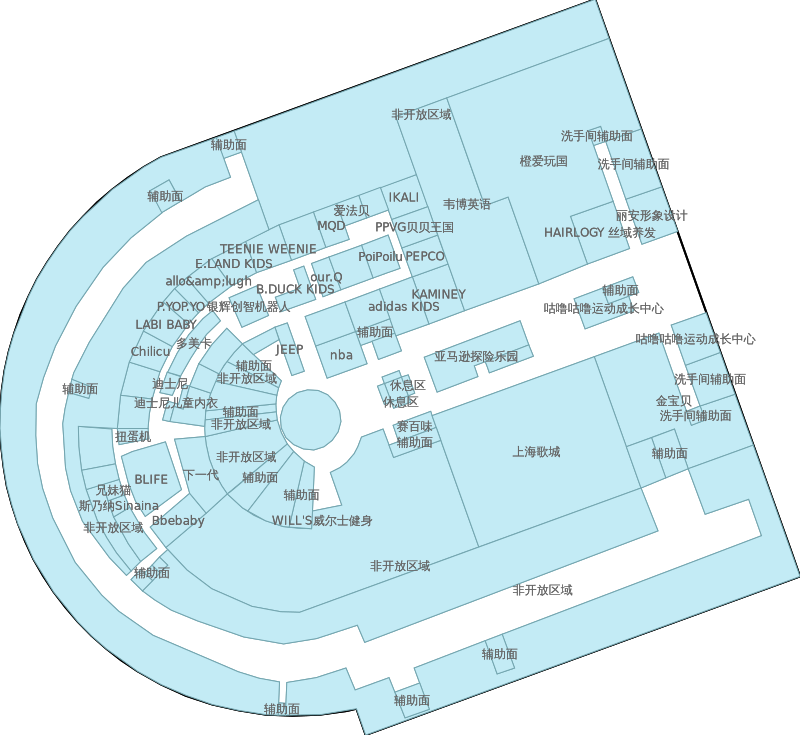

In [5]:
# Visualize path

from visualize_f import visualize_trajectory, visualize_heatmap

# Extract floor_plan_filename
site = path.split("/")[4]
floorNo = path.split("/")[5]
floor_plan_filename = f'{base}/metadata/{site}/{floorNo}/floor_image.png'

# Extract width_meter and height_meter
### (taken from the .json file)
json_plan_filename = f'{base}/metadata/{site}/{floorNo}/floor_info.json'
with open(json_plan_filename) as json_file:
    json_data = json.load(json_file)
width_meter = json_data["map_info"]["width"]
height_meter = json_data["map_info"]["height"]

visualize_trajectory(trajectory = trajectory_predict,
                     floor_plan_filename = floor_plan_filename,
                     width_meter = width_meter,
                     height_meter = height_meter,
                     mode='lines + markers',
                     title = 'Prediction Path',
                     g_size=1000,
                     point_color='#76C1A0',
                     start_color='#007B51',
                     end_color='#9B0000')


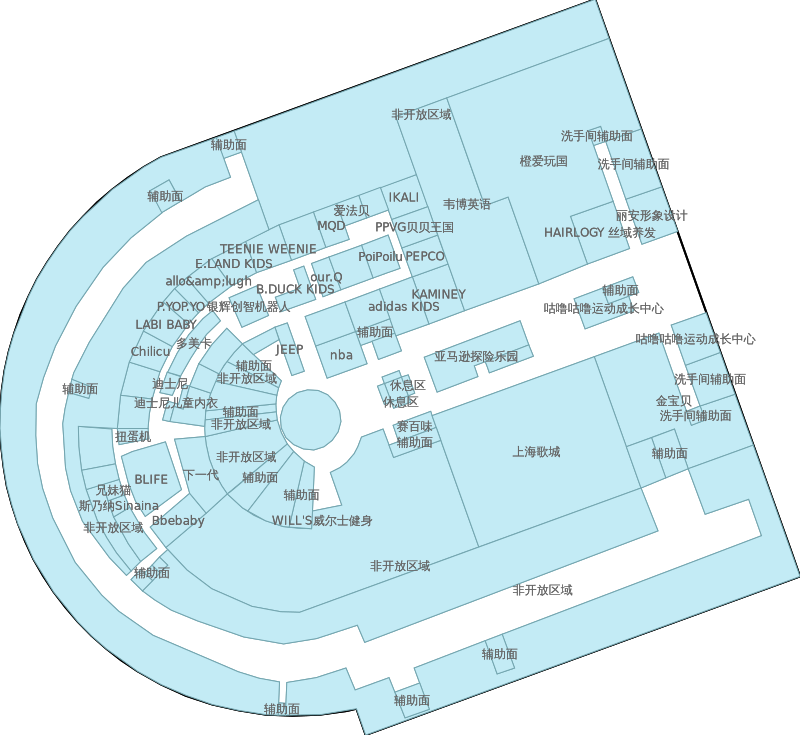

In [6]:
# Ground Truth Path for validation
visualize_trajectory(trajectory = trajectory_validation,
                     floor_plan_filename = floor_plan_filename,
                     width_meter = width_meter,
                     height_meter = height_meter,
                     mode='lines + markers',
                     title = 'Ground Truth Path',
                     g_size=1000,
                     point_color='#76C1A0',
                     start_color='#007B51',
                     end_color='#9B0000')